In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import func
from sqlalchemy import distinct

In [5]:
import numpy as np
import pandas as pd

In [6]:
import datetime as dt
from datetime import datetime
from scipy.stats import ttest_rel

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)
for row in session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).limit(10).all():
    print(row)

('USC00519397', '2010-01-01', 0.08, 65.0)
('USC00519397', '2010-01-02', 0.0, 63.0)
('USC00519397', '2010-01-03', 0.0, 74.0)
('USC00519397', '2010-01-04', 0.0, 76.0)
('USC00519397', '2010-01-06', None, 73.0)
('USC00519397', '2010-01-07', 0.06, 70.0)
('USC00519397', '2010-01-08', 0.0, 64.0)
('USC00519397', '2010-01-09', 0.0, 68.0)
('USC00519397', '2010-01-10', 0.0, 73.0)
('USC00519397', '2010-01-11', 0.01, 64.0)


# Exploratory Climate Analysis

<AxesSubplot:title={'center':'Precipitation over 12 Month Period'}, xlabel='date', ylabel='Precipitation'>

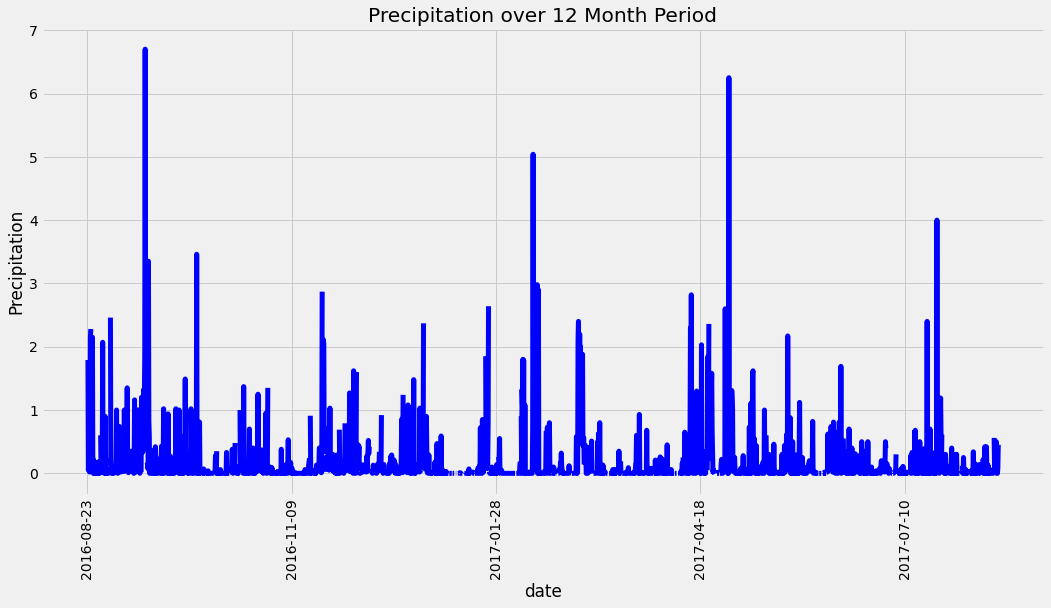

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_row = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_row[0]

twelve_months_ago = (dt.datetime.strptime(last_row[0], '%Y-%m-%d') - dt.timedelta(days = 365)).strftime('%Y-%m-%d')
twelve_months_ago


# Perform a query to retrieve the data and precipitation scores
columns = (Measurement.date, Measurement.prcp)
values = session.query(*columns).filter(Measurement.date >= twelve_months_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(values, columns=["date", "prcp"])
prcp_df.set_index("date", inplace=True)
# Sort the dataframe by date
prcp_df = prcp_df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(y = "prcp", color = "blue", title = "Precipitation over 12 Month Period", figsize = (16, 8), legend = False, ylabel = "Precipitation", linewidth = 5, rot = 90)



In [47]:
values

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [48]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [49]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.station).\
                group_by(Station.station)
station_count.count()

9

In [50]:
station_count.all()

[('USC00511918'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00516128'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519281'),
 ('USC00519397'),
 ('USC00519523')]

In [52]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
total_stations = session.query(Measurement.station).count()
total_stations
stations_count_byrow = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)
list_stations = stations_count_byrow.all()

stations_df = pd.DataFrame(list_stations, columns=["station", "count"])
stations_df = stations_df.sort_values(by="count", ascending=False)
stations_df.set_index("station")

,count
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [53]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
highest_temp = session.query(Measurement.station, func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281")
lowest_temp = session.query(Measurement.station, func.min(Measurement.tobs)).filter(Measurement.station == "USC00519281")
average_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281")

<AxesSubplot:ylabel='Frequency'>

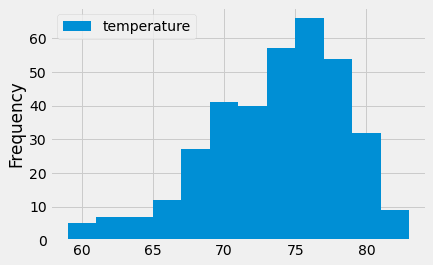

In [54]:
# Choose the station with the highest number of temperature observations.
temp_obvs = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).all()
temp_obvs_df = pd.DataFrame(temp_obvs, columns=["station", "temp_obvs"])
temp_obvs_df = temp_obvs_df.sort_values(by="temp_obvs", ascending=False)
temp_obvs_df
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
latest_obvs = session.query(Measurement.date).filter(Measurement.station == "USC00519281").order_by(Measurement.date.desc()).first()
latest_obvs[0]
year_ago = (dt.datetime.strptime(latest_obvs[0], '%Y-%m-%d') - dt.timedelta(days = 365)).strftime('%Y-%m-%d')
year_ago
temp_station = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= year_ago).\
    filter(Measurement.station == "USC00519281").\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
temp_df = pd.DataFrame(temp_station, columns = ["station", "temperature"])
temp_df.plot.hist(bins = 12)

In [55]:
temp_obvs_df

,station,temp_obvs
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


## Bonus Challenge Assignment

In [204]:
#TEMPERATURE ANALYSIS I
#Average temperature in June and December at all Stations across all available years in the dataset.
#Filter by date, month = 6 and month = 12.
june_date = "06"
dec_date = "12"
june_avg = session.query(func.avg(Measurement.tobs)).filter(func.strftime("%m", Measurement.date) == june_date).group_by(Measurement.station).all()
december_avg = session.query(func.avg(Measurement.tobs)).filter(func.strftime("%m", Measurement.date) == dec_date).group_by(Measurement.station).all()
june_avg
december_avg

[(69.6842105263158),
 (71.06944444444444),
 (73.2247191011236),
 (69.29126213592232),
 (71.8348623853211),
 (72.42105263157895),
 (69.90322580645162),
 (71.10952380952381),
 (72.43333333333334)]

In [205]:
#Use the t-test to determine whether the difference in the means, if any, is statistically significant. 
#Will you use a paired t-test, or an unpaired t-test? Why? 
ttest_rel(june_avg, december_avg)

Ttest_relResult(statistic=array([6.95696617]), pvalue=array([0.00011759]))

In [57]:
#TEMPERATURE ANALYSIS II
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))
                        

[(62.0, 69.57142857142857, 74.0)]


In [62]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
results = calc_temps('2011-02-28', '2011-03-05')
results

[(61.0, 69.75510204081633, 75.0)]

<AxesSubplot:title={'center':'Trip Avg Temp'}>

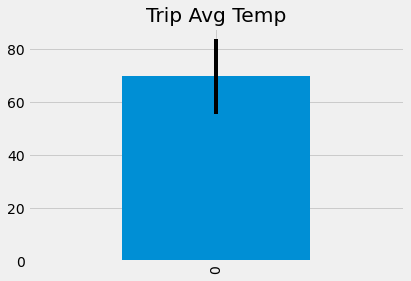

In [63]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
results_df = pd.DataFrame(results, columns = ["min", "avg", "max"])
results_df["avg"].plot.bar(x = None, title = "Trip Avg Temp", yerr = (results_df["max"] - results_df["min"]), legend = False)

In [39]:
#RAINFALL ANALYSIS
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = '2012-02-28'
end_date = '2012-03-05'
#merge two tables together
measurement_file = "hawaii_measurements.csv"
station_file = "hawaii_stations.csv"
measurement_data = pd.read_csv(measurement_file)
station_data = pd.read_csv(station_file)

measurement_data = measurement_data.loc[measurement_data["date"] >= '2012-02-28']
measurement_data = measurement_data.loc[measurement_data["date"] <= '2012-03-05']

measurement_data.drop("tobs", inplace=True, axis=1)
measurement_data = measurement_data.groupby(["station"]).sum()
measurement_data = measurement_data.sort_values("prcp", ascending = False)
measurement_data

compiled_data = pd.merge(measurement_data, station_data, how = "inner", on = "station")
compiled_data

,station,prcp,name,latitude,longitude,elevation
0,USC00519281,11.08,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
1,USC00516128,10.32,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
2,USC00513117,5.79,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,USC00518838,3.84,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
4,USC00519523,2.92,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
5,USC00519397,1.18,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
6,USC00511918,0.76,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
7,USC00514830,0.03,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
8,USC00517948,0.00,"PEARL CITY, HI US",21.39340,-157.97510,11.9


In [30]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals('01-01')

[(62.0, 69.15384615384616, 77.0)]

In [35]:
# Calculate the daily normals for your trip
# Push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
trip_start_date = '2012-02-28'
trip_end_date = '2012-03-05'
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date
start_date = dt.datetime.strptime(trip_start_date, '%Y-%m-%d')
end_date = dt.datetime.strptime(trip_end_date, '%Y-%m-%d')
trip_dates = []
normals =[]
while (start_date <= end_date):
    trip_dates.append(dt.datetime.strftime(start_date,'%Y-%m-%d'))
    dates = dt.datetime.strftime(start_date,'%m-%d')
    normals.append(list(np.ravel(daily_normals(dates))))
    start_date = start_date + dt.timedelta(days = 1)
normals

[[65.0, 70.65517241379311, 80.0],
 [67.0, 71.73333333333333, 79.0],
 [64.0, 70.0327868852459, 76.0],
 [61.0, 70.36666666666666, 78.0],
 [60.0, 70.06896551724138, 78.0],
 [57.0, 69.27272727272727, 77.0],
 [60.0, 67.89090909090909, 76.0]]

In [36]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals, columns=['tmin','tavg','tmax'])
normals_df['Date'] = trip_dates
normals_df = normals_df.set_index('Date')
normals_df

,tmin,tavg,tmax
Date,,,
2012-02-28,65.0,70.655172,80.0
2012-02-29,67.0,71.733333,79.0
2012-03-01,64.0,70.032787,76.0
2012-03-02,61.0,70.366667,78.0
2012-03-03,60.0,70.068966,78.0
2012-03-04,57.0,69.272727,77.0
2012-03-05,60.0,67.890909,76.0


<AxesSubplot:title={'center':'Daily Normals'}, xlabel='Date'>

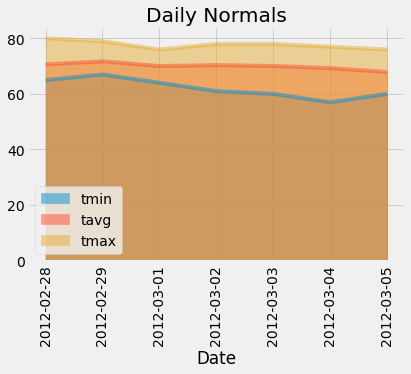

In [38]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot.area(stacked=False, title='Daily Normals', rot = 90)